In [1]:
#Data Manipulation
import pandas as pd
import numpy as np

# Machine learning (preprocessing, models, evaluation)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

# Graphics
from tqdm import tqdm

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

In [2]:
df18 = pd.read_csv('C:/Users/Owner/Desktop/Final_DS_Project/Data_2/2018_Financial_Data.csv')
df17 = pd.read_csv('C:/Users/Owner/Desktop/Final_DS_Project/Data_2/2017_Financial_Data.csv')
df16 = pd.read_csv('C:/Users/Owner/Desktop/Final_DS_Project/Data_2/2016_Financial_Data.csv')
df15 = pd.read_csv('C:/Users/Owner/Desktop/Final_DS_Project/Data_2/2015_Financial_Data.csv')
df14 = pd.read_csv('C:/Users/Owner/Desktop/Final_DS_Project/Data_2/2014_Financial_Data.csv')

In [3]:
#Rename 2018 Ticker column
df18 = df18.rename(columns={'Unnamed: 0': 'Ticker'})

#Rename 2017 Ticker column
df17 = df17.rename(columns={'Unnamed: 0': 'Ticker'})

#Rename 2016 Ticker column
df16 = df16.rename(columns={'Unnamed: 0': 'Ticker'})

#Rename 2015 Ticker column
df15 = df15.rename(columns={'Unnamed: 0': 'Ticker'})

#Rename 2014 Ticker column
df14 = df14.rename(columns={'Unnamed: 0': 'Ticker'})


In [4]:
df18.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [5]:
df17.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2018 PRICE VAR [%],Class
0,PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.000000e+00,1.865400e+10,1.865400e+10,1.376600e+10,4.650000e+08,...,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0000,-0.0156,Consumer Defensive,4.975151,1
1,VIPS,1.102060e+10,0.3525,8.557810e+09,2.462794e+09,2.733452e+08,8.201852e+08,2.056136e+09,4.066575e+08,1.245995e+07,...,0.9219,0.4764,0.5889,1.5821,0.3805,0.2141,0.1920,Consumer Defensive,-56.320000,0
2,KR,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,0.000000e+00,1.916200e+10,2.238300e+10,3.452000e+09,5.220000e+08,...,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0000,0.0678,Consumer Defensive,-0.990449,0
3,RAD,2.292754e+10,0.1039,1.786283e+10,5.064707e+09,0.000000e+00,4.776995e+09,4.816124e+09,2.485830e+08,2.000650e+08,...,0.1063,-0.3365,0.0281,0.0502,-0.5295,0.0000,0.0427,Consumer Defensive,-66.666666,0
4,GIS,1.561980e+10,-0.0570,1.005200e+10,5.567800e+09,0.000000e+00,2.888800e+09,3.069200e+09,2.498600e+09,2.951000e+08,...,0.0509,0.0494,0.0046,-0.0943,0.1246,0.0000,-0.0738,Consumer Defensive,-31.280412,0


In [6]:
df16.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2017 PRICE VAR [%],Class
0,PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.000000e+00,1.894900e+10,1.894900e+10,1.344100e+10,5.790000e+08,...,-0.0427,-0.0528,-0.0182,-0.0627,0.0083,0.0000,-0.0809,Consumer Defensive,12.532463,1
1,VIPS,8.148496e+09,0.3156,6.190740e+09,1.957756e+09,2.251378e+08,6.880959e+08,1.567877e+09,3.898789e+08,1.226710e+07,...,0.9234,0.0128,0.1706,0.5109,-0.0139,0.3575,0.3172,Consumer Defensive,4.363319,1
2,KR,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,0.000000e+00,1.794600e+10,2.075800e+10,3.576000e+09,4.820000e+08,...,0.3697,0.0844,0.1115,0.2797,0.0416,0.0000,0.0457,Consumer Defensive,-17.068252,0
3,RAD,2.077024e+10,-0.2171,1.577826e+10,4.991979e+09,0.000000e+00,4.581171e+09,4.621042e+09,3.709370e+08,1.861320e+08,...,0.6322,-0.0645,0.2848,8.5628,0.2581,0.0000,-0.3158,Consumer Defensive,-75.916870,0
4,GIS,1.656310e+10,-0.0605,1.073360e+10,5.829500e+09,0.000000e+00,3.118900e+09,3.270300e+09,2.559200e+09,3.038000e+08,...,-0.0187,-0.0825,-0.0055,-0.0105,-0.0828,0.0000,-0.0628,Consumer Defensive,-1.162942,0


In [7]:
df15.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2016 PRICE VAR [%],Class
0,PG,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.000000e+00,2.061600e+10,2.264400e+10,1.104900e+10,6.260000e+08,...,-0.2847,-0.2634,-0.1024,-0.1013,-0.1432,0.0000,-0.0394,Consumer Defensive,10.809451,1
1,VIPS,6.193685e+09,0.6587,4.669038e+09,1.524648e+09,1.658481e+08,5.223879e+08,1.205660e+09,3.189877e+08,1.321245e+07,...,28.6759,0.2144,0.1279,0.2946,0.0281,0.5309,0.5179,Consumer Defensive,-21.637010,0
2,KR,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,0.000000e+00,1.716100e+10,1.981600e+10,3.137000e+09,4.880000e+08,...,0.1344,0.0065,0.0415,0.0535,0.0254,0.0000,0.1293,Consumer Defensive,-15.036503,0
3,RAD,2.652838e+10,0.0393,1.895164e+10,7.576732e+09,0.000000e+00,6.695642e+09,6.733788e+09,8.429440e+08,3.976120e+08,...,0.0336,-0.0371,0.2639,1.0266,-0.0344,0.0000,0.0205,Consumer Defensive,4.303799,1
4,GIS,1.763030e+10,-0.0156,1.168110e+10,5.949200e+09,0.000000e+00,3.328000e+09,3.871900e+09,2.077300e+09,3.154000e+08,...,-0.0653,-0.0119,-0.0568,-0.2118,0.0462,0.0000,-0.0421,Consumer Defensive,10.693172,1


In [8]:
df14.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


## Sort by Ticker, Revenue, Revenue Growth, and Cost of Revenue for each year


In [9]:
#top performing stocks each year
#filter by top 10 for each performing stocks based on revenue, revenue growth, and cost of revenue


## Sort Tickers by Revenue, Revenue Growth, and Cost of Revenue for 2018

In [10]:
#Sorted by Revenue
df_revenues_18 = df18[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_revenue_18 = df_revenues_18.sort_values(by='Revenue', ascending=False)
df_revenue_18.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
90,WMT,5.003430e+11,0.0298,3.733960e+11
1482,SNP,4.184051e+11,0.1729,3.318355e+11
2204,PTR,3.406061e+11,0.1178,2.435654e+11
427,BP,3.037380e+11,0.2419,2.544190e+11
36,XOM,2.902120e+11,0.1876,1.888350e+11


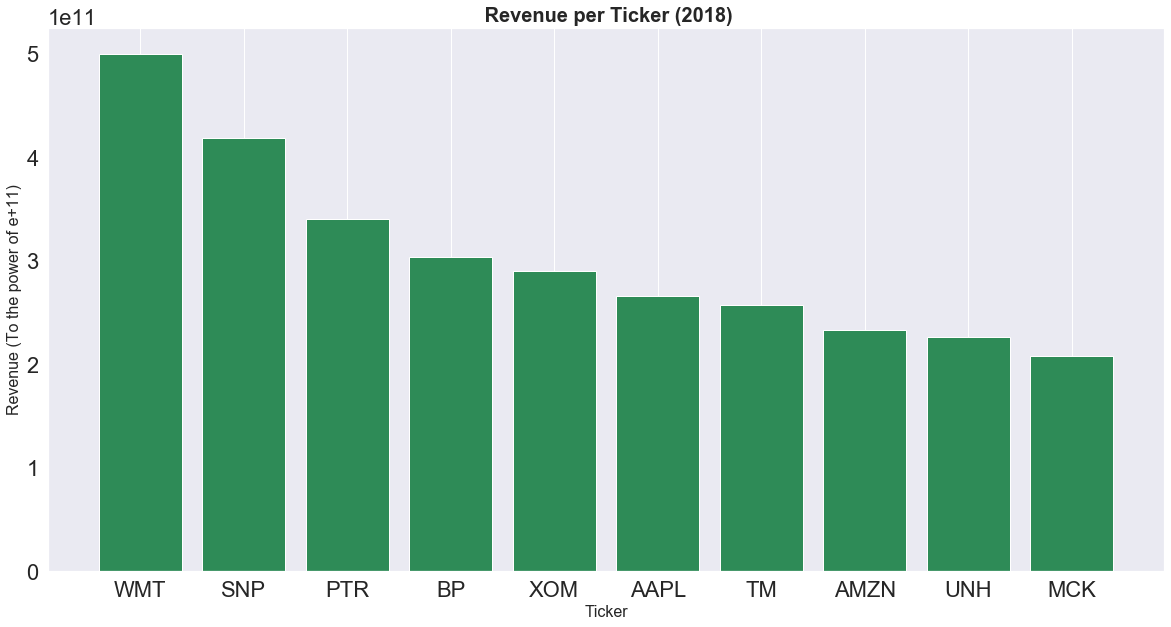

In [11]:
df_revenue_18_final = df_revenue_18[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_revenue_18_final.Ticker, df_revenue_18_final["Revenue"], color="seagreen")


plt.title(" Revenue per Ticker (2018)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Revenue (To the power of e+11)", fontsize=16)

plt.grid(axis='y')

#plt.savefig("Revenue2018.png")

plt.show()

In [12]:
#Sorted by Revenue Growth
df_revenues_18 = df18[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_growth_18 = df_revenues_18.sort_values(by='Revenue Growth', ascending=False)
df_growth_18.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
3535,ALBO,1.274000e+07,12739.0000,0.0
2808,TOCA,1.803600e+07,438.9024,0.0
81,AABA,2.119900e+10,277.9342,NaN
1787,FLXN,2.252400e+07,62.4479,7336000.0
2019,ADMS,3.404600e+07,58.6252,633000.0


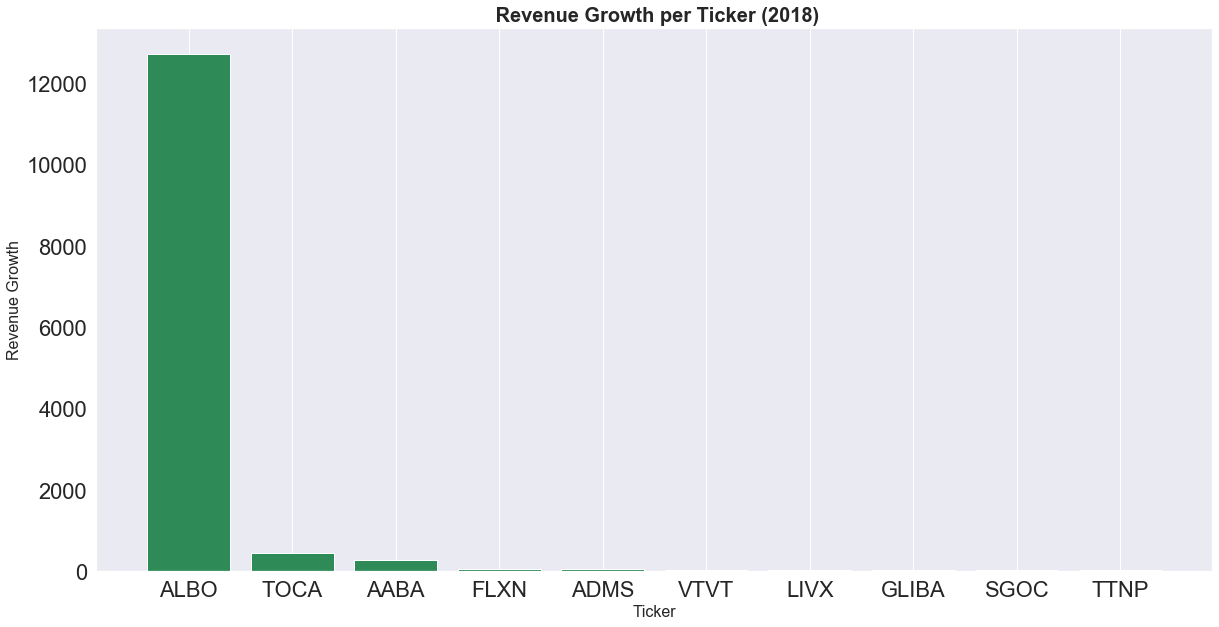

In [13]:
df_growth_18_final = df_growth_18[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_growth_18_final.Ticker, df_growth_18_final["Revenue Growth"], color="seagreen")


plt.title(" Revenue Growth per Ticker (2018)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Revenue Growth", fontsize=16)

plt.grid(axis='y')

#plt.savefig("RevenueGrowth2018.png")

plt.show()

In [14]:
#Sorted by Cost of Revenue
df_revenues_18 = df18[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_cost_18 = df_revenues_18.sort_values(by='Cost of Revenue', ascending=False)
df_cost_18.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
90,WMT,5.003430e+11,0.0298,3.733960e+11
1482,SNP,4.184051e+11,0.1729,3.318355e+11
427,BP,3.037380e+11,0.2419,2.544190e+11
2204,PTR,3.406061e+11,0.1178,2.435654e+11
2059,TM,2.569846e+11,0.0317,2.089601e+11


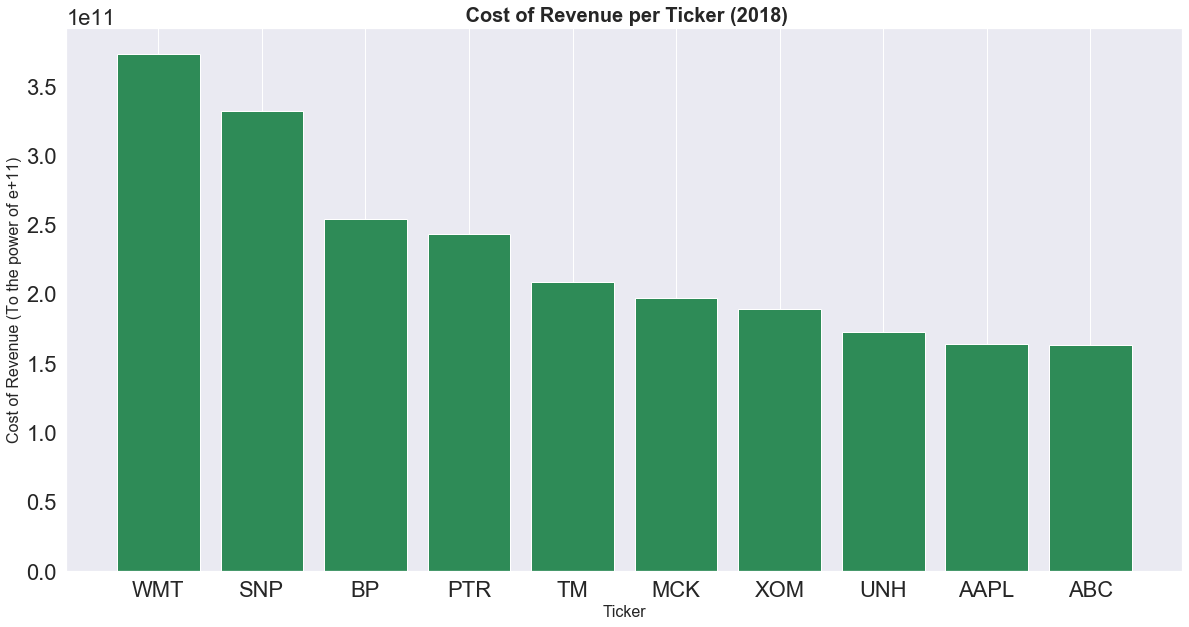

In [15]:
df_cost_18_final = df_cost_18[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_cost_18_final.Ticker, df_cost_18_final["Cost of Revenue"], color="seagreen")


plt.title(" Cost of Revenue per Ticker (2018)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Cost of Revenue (To the power of e+11)", fontsize=16)

plt.grid(axis='y')

#plt.savefig("RevenueCost2018.png")

plt.show()

In [16]:
##IGNORE THIS CELL

#gb = df_revenues_18.groupby(['Ticker', 'Revenue', 'Revenue Growth','Cost of Revenue'])
#gb.apply(lambda df_revenues_18: df_revenues_18.sort_values(by=['Revenue'])

#df_revenues_18_sort = df18.sort_values(by='Revenue', ascending=False)
#df_revenues_18_sort.head()

## Sort Tickers by Revenue, Revenue Growth, and Cost of Revenue for 2017

In [17]:
df_revenues_17 = df17[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]].groupby(["Revenue","Revenue Growth","Cost of Revenue"])
df_revenues_17.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
0,PG,6.505800e+10,-0.0037,3.263800e+10
1,VIPS,1.102060e+10,0.3525,8.557810e+09
2,KR,1.153370e+11,0.0501,8.950200e+10
3,RAD,2.292754e+10,0.1039,1.786283e+10
4,GIS,1.561980e+10,-0.0570,1.005200e+10
...,...,...,...,...
4954,TRNS,1.438980e+08,0.1779,1.089280e+08
4955,TSRI,6.257258e+07,0.0258,5.232652e+07
4956,TZOO,1.065240e+08,-0.0677,1.290900e+07
4958,WSTG,1.605670e+08,-0.0246,1.334910e+08


In [18]:
#Sorted by Revenue
df_revenues_17 = df17[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_revenue_17 = df_revenues_17.sort_values(by='Revenue', ascending=False)
df_revenue_17.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
4042,KST,1.695864e+12,NaN,1.465577e+12
7,WMT,4.858730e+11,0.0078,3.612560e+11
2798,SNP,3.567402e+11,0.2831,2.676317e+11
2829,PTR,3.046992e+11,0.3088,2.132860e+11
1500,TM,2.490856e+11,-0.0152,2.051946e+11


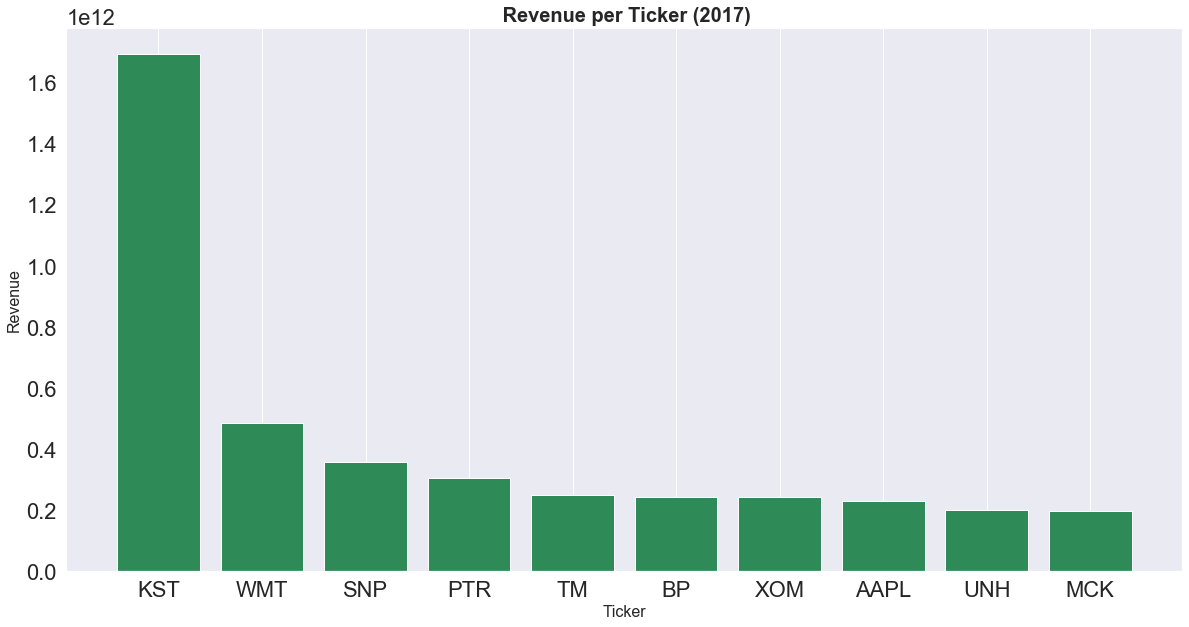

In [19]:
df_revenue_17_final = df_revenue_17[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_revenue_17_final.Ticker, df_revenue_17_final["Revenue"], color="seagreen")


plt.title(" Revenue per Ticker (2017)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Revenue", fontsize=16)

plt.grid(axis='y')

#plt.savefig("Revenue2017.png")

plt.show()
#explain change in power number (ex. 12 to 11)

In [20]:
#Sorted by Revenue Growth
df_revenues_17 = df17[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_growth_17 = df_revenues_17.sort_values(by='Revenue Growth', ascending=False)
df_growth_17.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
793,CNCE,143891000.0,825.9598,0.0
564,CLVS,55511000.0,710.6795,11737000.0
714,PRTK,12616000.0,434.0345,0.0
582,BGNE,238387000.0,221.7916,4974000.0
647,ARWR,31407709.0,197.3649,0.0


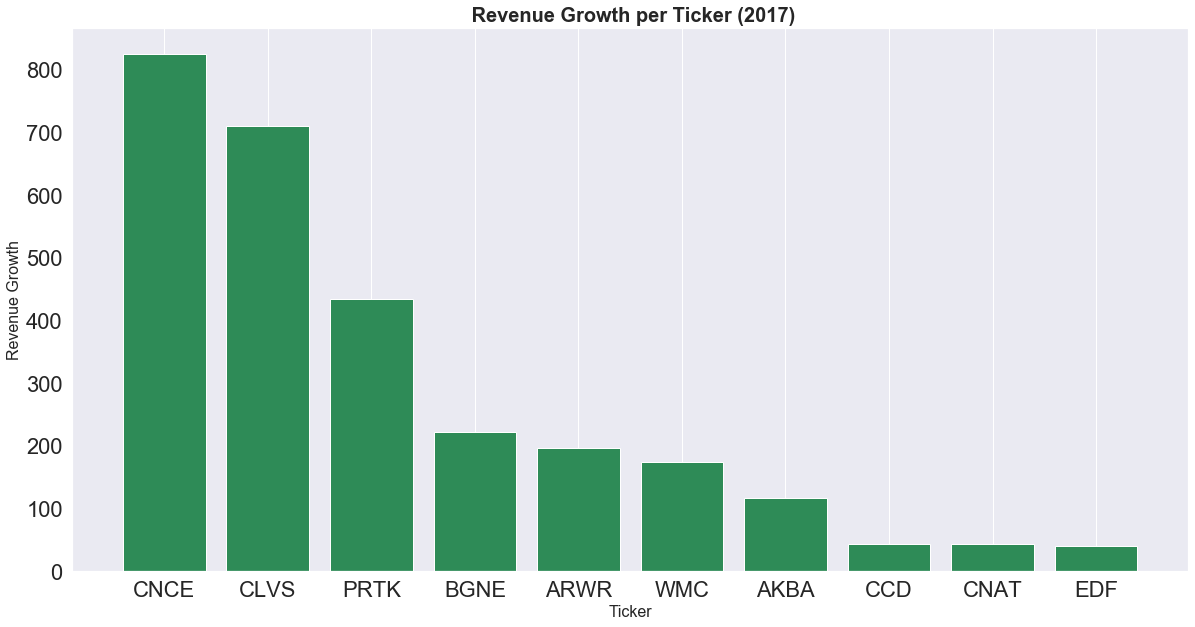

In [21]:
df_growth_17_final = df_growth_17[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_growth_17_final.Ticker, df_growth_17_final["Revenue Growth"], color="seagreen")


plt.title(" Revenue Growth per Ticker (2017)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Revenue Growth", fontsize=16)

plt.grid(axis='y')

#plt.savefig("RevenueGrowth2017.png")

plt.show()

In [22]:
#Sorted by Cost of Revenue
df_revenues_17 = df17[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_cost_17 = df_revenues_17.sort_values(by='Cost of Revenue', ascending=False)
df_cost_17.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
4042,KST,1.695864e+12,NaN,1.465577e+12
7,WMT,4.858730e+11,0.0078,3.612560e+11
2798,SNP,3.567402e+11,0.2831,2.676317e+11
2829,PTR,3.046992e+11,0.3088,2.132860e+11
2728,BP,2.445820e+11,0.3107,2.057200e+11


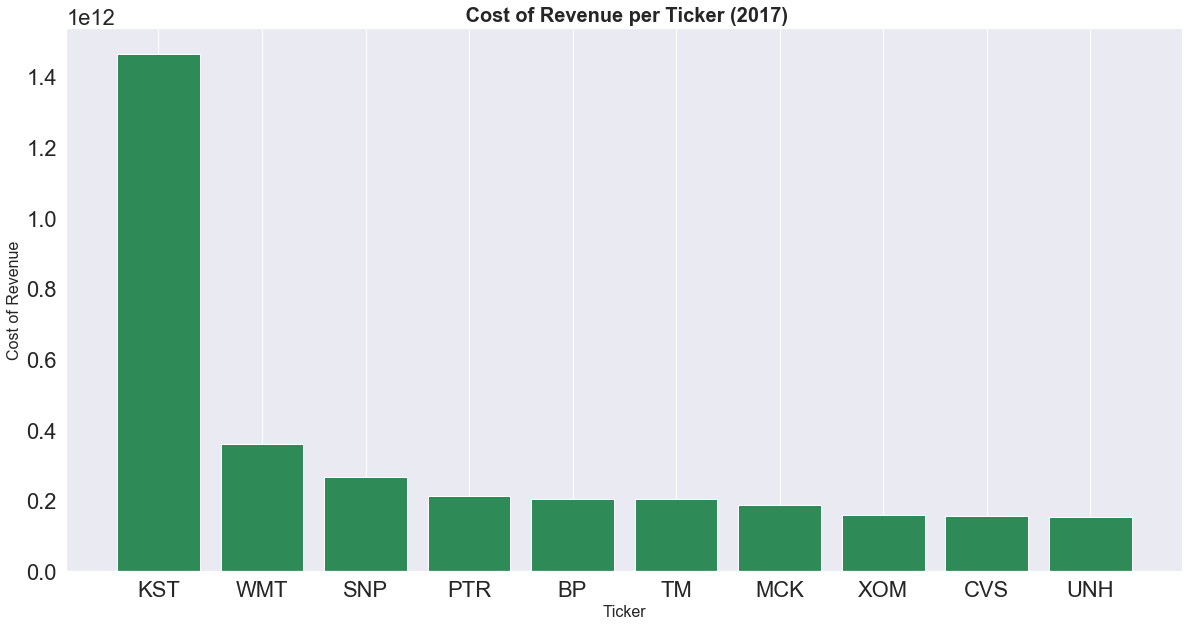

In [23]:
df_cost_17_final = df_cost_17[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_cost_17_final.Ticker, df_cost_17_final["Cost of Revenue"], color="seagreen")


plt.title(" Cost of Revenue per Ticker (2017)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Cost of Revenue", fontsize=16)

plt.grid(axis='y')

#plt.savefig("RevenueCost2017.png")

plt.show()
#explain change in power number (ex. 12 to 11)

## Sort Tickers by Revenue, Revenue Growth, and Cost of Revenue for 2016

In [24]:
df_revenues_16 = df16[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]
df_revenues_16.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
0,PG,6.529900e+10,-0.0770,3.290900e+10
1,VIPS,8.148496e+09,0.3156,6.190740e+09
2,KR,1.098300e+11,0.0126,8.549600e+10
3,RAD,2.077024e+10,-0.2171,1.577826e+10
4,GIS,1.656310e+10,-0.0605,1.073360e+10


In [25]:
#Sorted by Revenue
df_revenues_16 = df16[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_revenue_16 = df_revenues_16.sort_values(by='Revenue', ascending=False)
df_revenue_16.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
3906,KST,1.822805e+12,NaN,1.548384e+12
7,WMT,4.821300e+11,-0.0073,3.609840e+11
2698,SNP,2.780289e+11,-0.1068,1.986596e+11
1454,TM,2.529308e+11,0.1136,2.013025e+11
2723,PTR,2.328154e+11,-0.1242,1.551191e+11


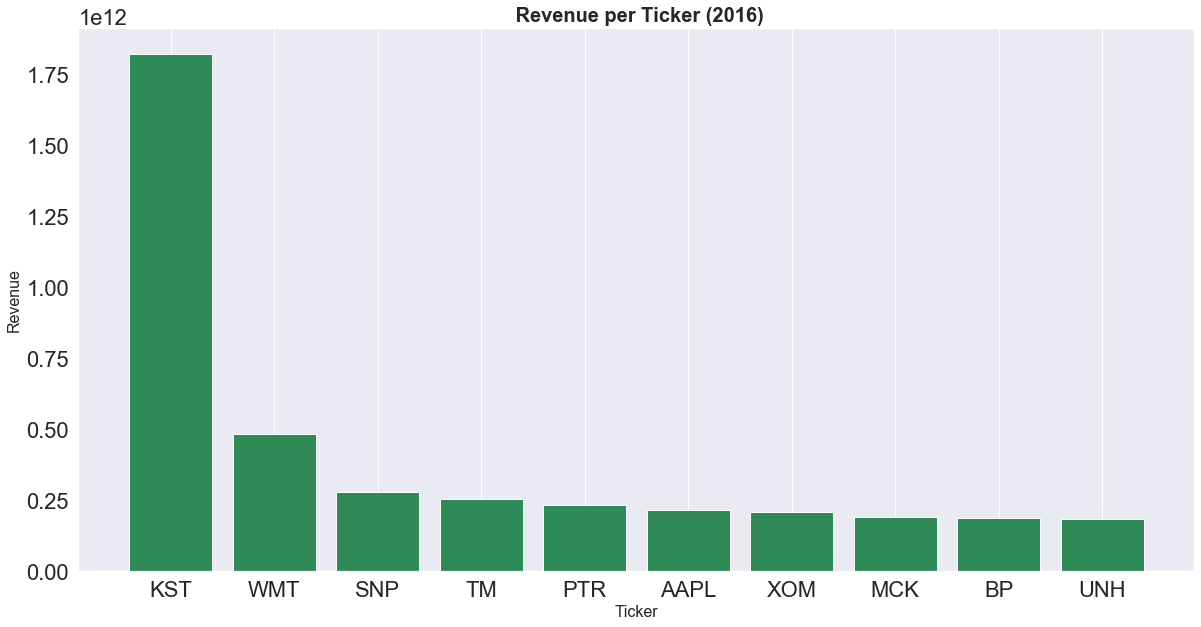

In [26]:
df_revenue_16_final = df_revenue_16[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_revenue_16_final.Ticker, df_revenue_16_final["Revenue"], color="seagreen")


plt.title(" Revenue per Ticker (2016)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Revenue", fontsize=16)

plt.grid(axis='y')

#plt.savefig("Revenue2016.png")

plt.show()
#explain change in power number (ex. 12 to 11)

In [27]:
#Sorted by Revenue Growth
df_revenues_16 = df16[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_growth_16 = df_revenues_16.sort_values(by='Revenue Growth', ascending=False)
df_growth_16.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
1030,CYAD,1.053895e+07,3234.4568,1.623158e+06
877,OPTN,4.750000e+07,557.8235,0.000000e+00
2122,PIXY,8.460653e+06,469.0363,6.944224e+06
3348,EOI,5.330000e+07,396.7612,NaN
4770,PRKR,4.064000e+06,375.9944,3.420000e+05


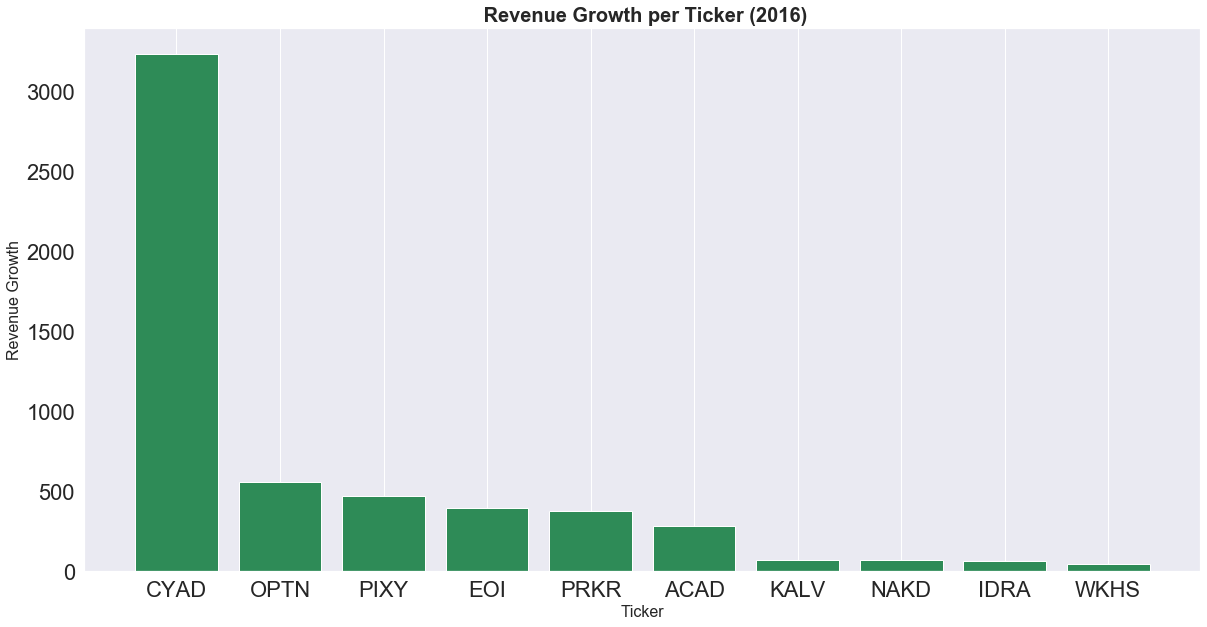

In [28]:
df_growth_16_final = df_growth_16[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_growth_16_final.Ticker, df_growth_16_final["Revenue Growth"], color="seagreen")


plt.title(" Revenue Growth per Ticker (2016)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Revenue Growth", fontsize=16)

plt.grid(axis='y')

#plt.savefig("RevenueGrowth2016.png")

plt.show()

In [29]:
#Sorted by Cost of Revenue
df_revenues_16 = df16[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_cost_16 = df_revenues_16.sort_values(by='Cost of Revenue', ascending=False)
df_cost_16.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
3906,KST,1.822805e+12,NaN,1.548384e+12
7,WMT,4.821300e+11,-0.0073,3.609840e+11
1454,TM,2.529308e+11,0.1136,2.013025e+11
2698,SNP,2.780289e+11,-0.1068,1.986596e+11
558,MCK,1.908840e+11,0.0661,1.794680e+11


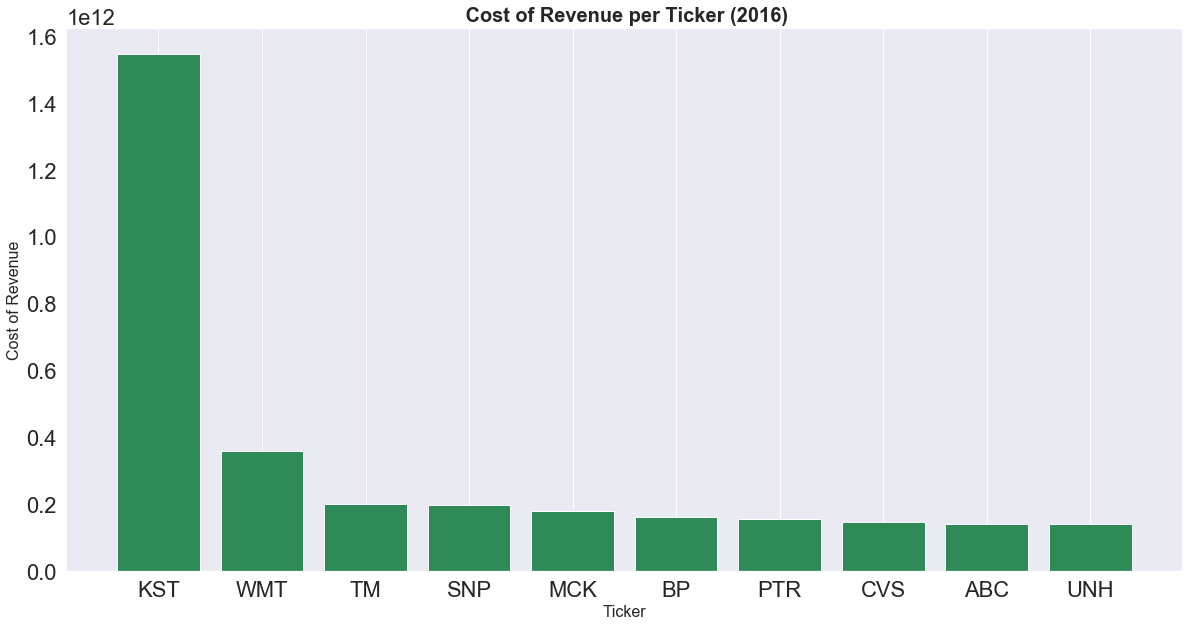

In [30]:
df_cost_16_final = df_cost_16[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_cost_16_final.Ticker, df_cost_16_final["Cost of Revenue"], color="seagreen")


plt.title(" Cost of Revenue per Ticker (2016)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Cost of Revenue", fontsize=16)

plt.grid(axis='y')

#plt.savefig("RevenueCost2016.png")

plt.show()
#explain change in power number (ex. 12 to 11)

## Sort Tickers by Revenue, Revenue Growth, and Cost of Revenue for 2015

In [31]:
df_revenues_15 = df15[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]
df_revenues_15.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
0,PG,7.074900e+10,-0.0491,3.705600e+10
1,VIPS,6.193685e+09,0.6587,4.669038e+09
2,KR,1.084650e+11,0.1026,8.551200e+10
3,RAD,2.652838e+10,0.0393,1.895164e+10
4,GIS,1.763030e+10,-0.0156,1.168110e+10


In [32]:
#Sorted by Revenue
df_revenues_15 = df15[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_revenue_15 = df_revenues_15.sort_values(by='Revenue', ascending=False)
df_revenue_15.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
3345,KST,1.886894e+12,NaN,1.581527e+12
7,WMT,4.856510e+11,0.0196,3.650860e+11
2521,SNP,3.112579e+11,-0.3182,2.301719e+11
2545,PTR,2.658185e+11,-0.2788,1.810009e+11
2407,XOM,2.492480e+11,-0.3949,1.603120e+11


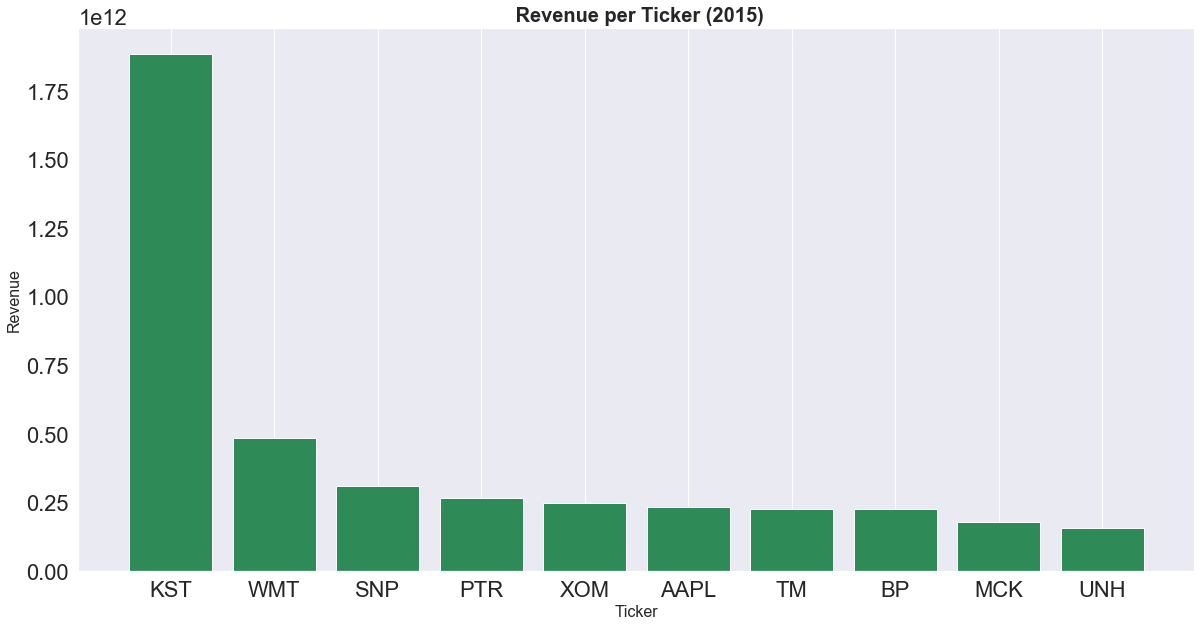

In [33]:
df_revenue_15_final = df_revenue_15[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_revenue_15_final.Ticker, df_revenue_15_final["Revenue"], color="seagreen")


plt.title(" Revenue per Ticker (2015)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Revenue", fontsize=16)

plt.grid(axis='y')

#plt.savefig("Revenue2015.png")

plt.show()
#explain change in power number (ex. 12 to 11)

In [34]:
#Sorted by Revenue Growth
df_revenues_15 = df15[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_growth_15 = df_revenues_15.sort_values(by='Revenue Growth', ascending=False)
df_growth_15.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
1531,NAKD,106326000.0,189.8179,56145000.0
988,AEZS,545000.0,48.5455,0.0
2525,NBLX,87837000.0,41.1079,16933000.0
695,ONCE,22063674.0,33.8045,0.0
389,AUMN,8071000.0,33.3447,10065000.0


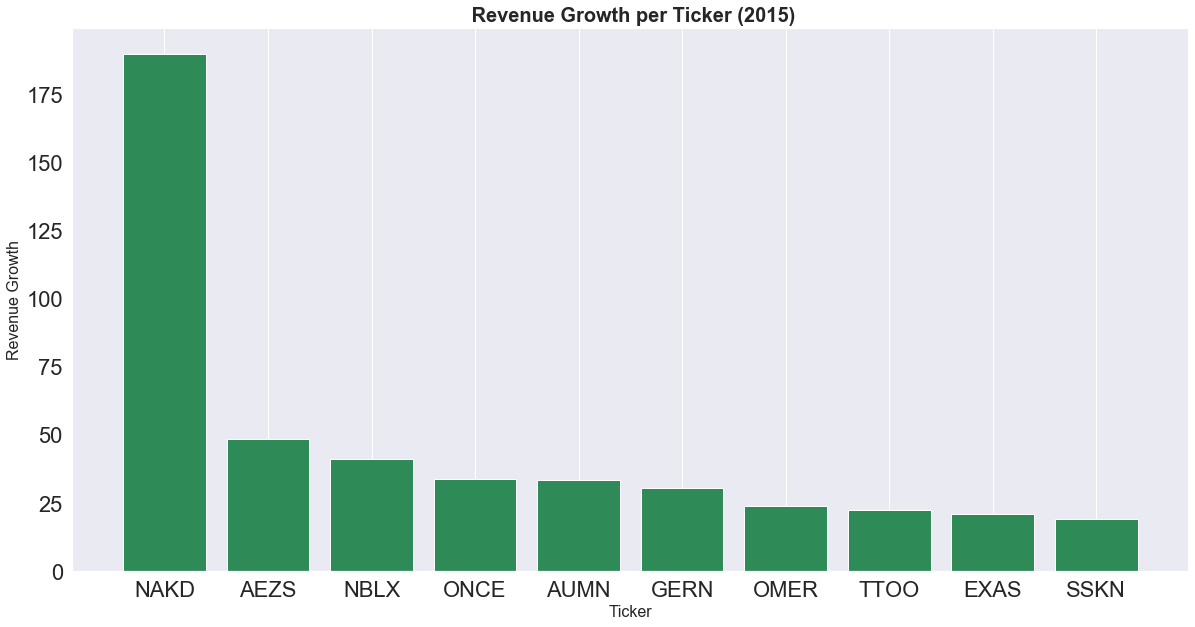

In [35]:
df_growth_15_final = df_growth_15[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_growth_15_final.Ticker, df_growth_15_final["Revenue Growth"], color="seagreen")


plt.title(" Revenue Growth per Ticker (2015)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Revenue Growth", fontsize=16)

plt.grid(axis='y')

#plt.savefig("RevenueGrowth2015.png")

plt.show()

In [36]:
#Sorted by Cost of Revenue
df_revenues_15 = df15[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_cost_15 = df_revenues_15.sort_values(by='Cost of Revenue', ascending=False)
df_cost_15.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
3345,KST,1.886894e+12,NaN,1.581527e+12
7,WMT,4.856510e+11,0.0196,3.650860e+11
2521,SNP,3.112579e+11,-0.3182,2.301719e+11
2460,BP,2.259820e+11,-0.3700,2.028660e+11
1350,TM,2.271247e+11,-0.0905,1.821506e+11


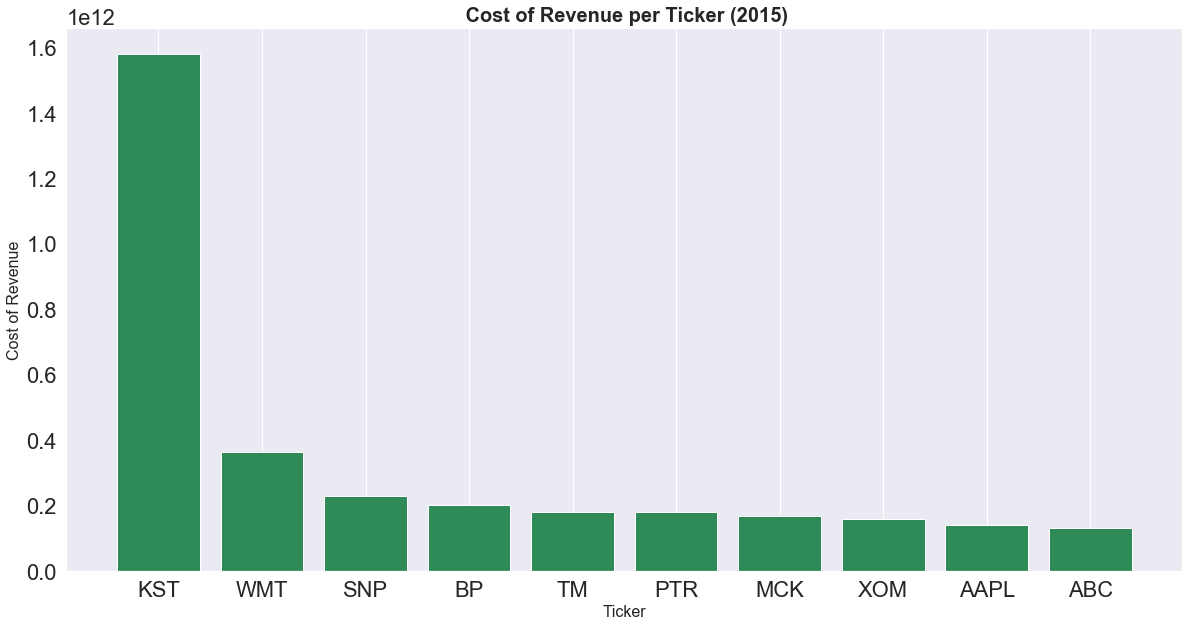

In [37]:
df_cost_15_final = df_cost_15[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_cost_15_final.Ticker, df_cost_15_final["Cost of Revenue"], color="seagreen")


plt.title(" Cost of Revenue per Ticker (2015)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Cost of Revenue", fontsize=16)

plt.grid(axis='y')

#plt.savefig("RevenueCost2015.png")

plt.show()
#explain change in power number (ex. 12 to 11)

## Sort Tickers by Revenue, Revenue Growth, and Cost of Revenue for 2014

In [38]:
df_revenues_14 = df14[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]
df_revenues_14.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
0,PG,7.440100e+10,-0.0713,3.903000e+10
1,VIPS,3.734148e+09,1.1737,2.805625e+09
2,KR,9.837500e+10,0.0182,7.813800e+10
3,RAD,2.552641e+10,0.0053,1.820268e+10
4,GIS,1.790960e+10,0.0076,1.153980e+10


In [39]:
#Sorted by Revenue
df_revenues_14 = df14[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_revenue_14 = df_revenues_14.sort_values(by='Revenue', ascending=False)
df_revenue_14.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
3079,KST,1.824698e+12,NaN,1.537249e+12
2181,AMX,8.482620e+11,NaN,3.861020e+11
7,WMT,4.762940e+11,0.0163,3.580690e+11
2364,SNP,4.565008e+11,-0.0386,3.770633e+11
2255,XOM,4.119390e+11,-0.0600,2.876000e+11


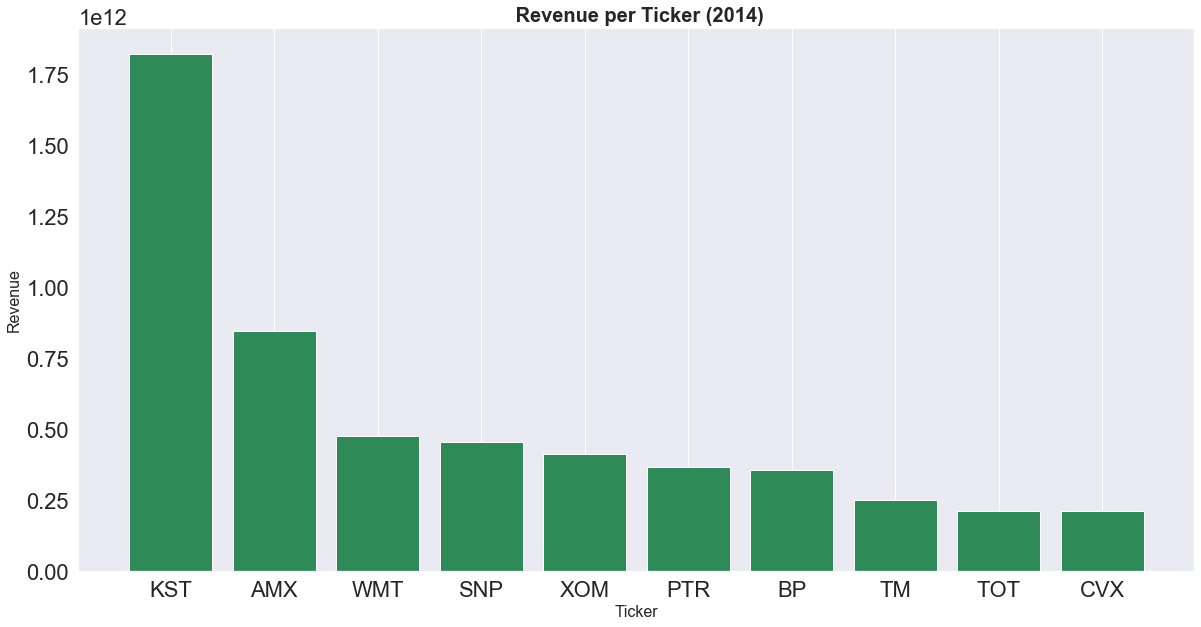

In [40]:
df_revenue_14_final = df_revenue_14[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_revenue_14_final.Ticker, df_revenue_14_final["Revenue"], color="seagreen")


plt.title(" Revenue per Ticker (2014)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Revenue", fontsize=16)

plt.grid(axis='y')

#plt.savefig("Revenue2014.png")

plt.show()
#explain change in power number (ex. 12 to 11)

In [41]:
#Sorted by Revenue Growth
df_revenues_14 = df14[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_growth_14 = df_revenues_14.sort_values(by='Revenue Growth', ascending=False)
df_growth_14.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
3056,FPAY,5014620.0,42138.6639,3330786.0
572,VCEL,28796000.0,1514.5789,17293000.0
857,RDHL,7014000.0,583.5000,1050000.0
3679,HEAR,186176000.0,329.7432,135509000.0
2424,ESES,834482.0,172.8504,4303784.0


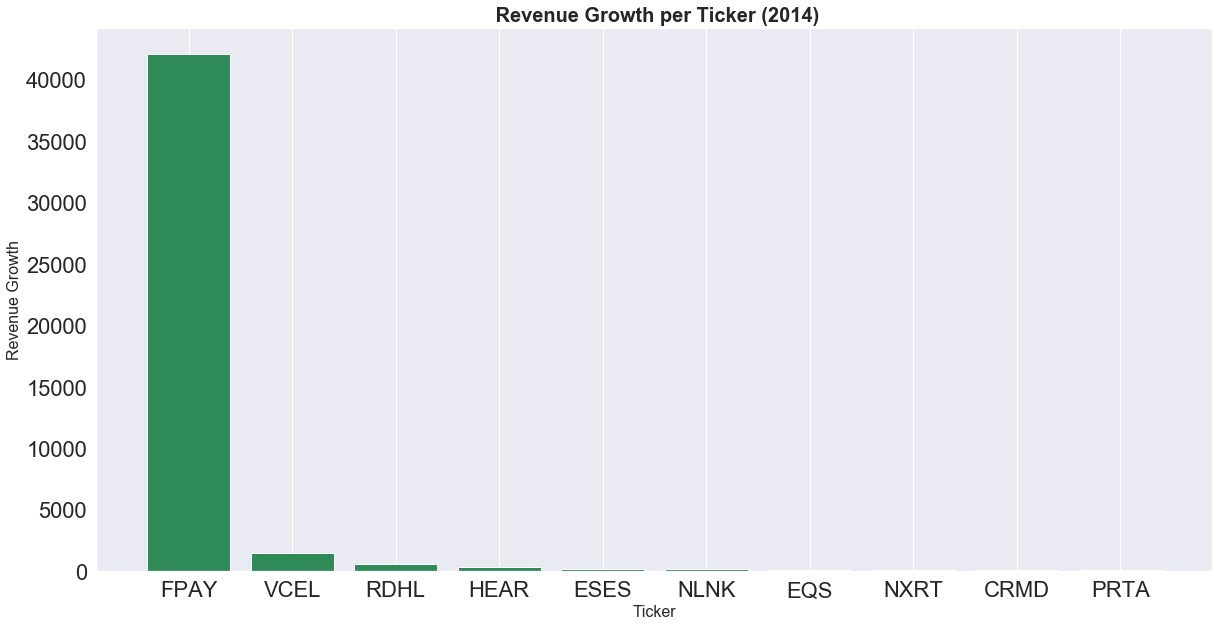

In [42]:
df_growth_14_final = df_growth_14[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_growth_14_final.Ticker, df_growth_14_final["Revenue Growth"], color="seagreen")


plt.title(" Revenue Growth per Ticker (2014)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Revenue Growth", fontsize=16)

plt.grid(axis='y')

#plt.savefig("RevenueGrowth2014.png")

plt.show()

In [43]:
#Sorted by Cost of Revenue
df_revenues_14 = df14[["Ticker","Revenue","Revenue Growth","Cost of Revenue"]]

df_cost_14 = df_revenues_14.sort_values(by='Cost of Revenue', ascending=False)
df_cost_14.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue
3079,KST,1.824698e+12,NaN,1.537249e+12
2181,AMX,8.482620e+11,NaN,3.861020e+11
2364,SNP,4.565008e+11,-0.0386,3.770633e+11
7,WMT,4.762940e+11,0.0163,3.580690e+11
2306,BP,3.586780e+11,-0.0947,3.122400e+11


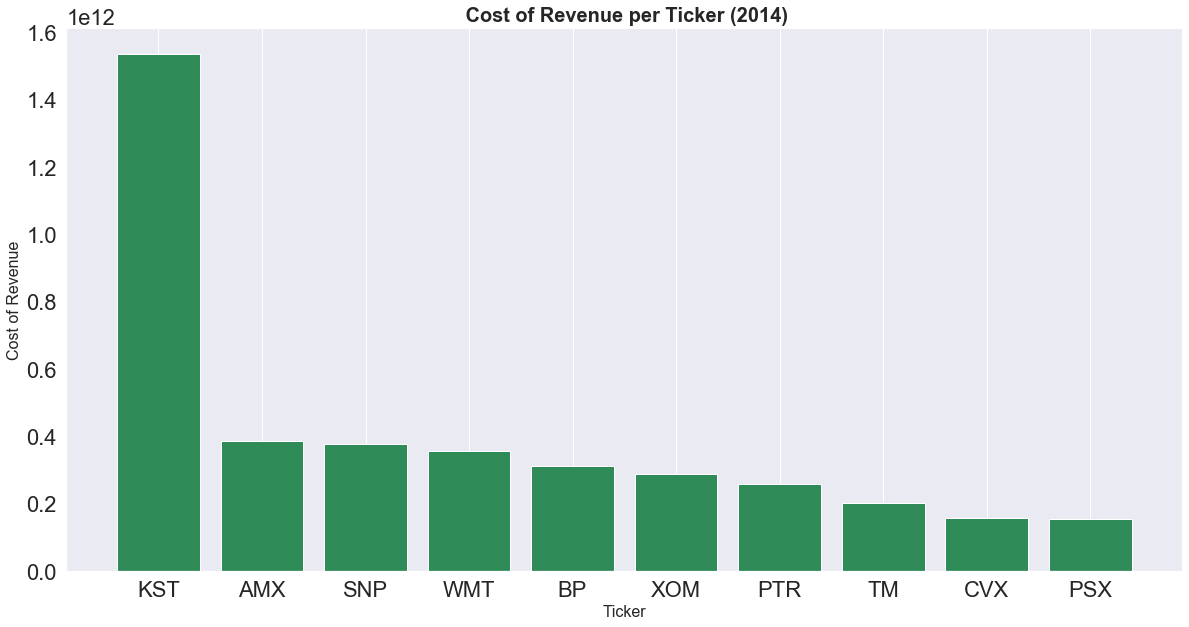

In [44]:
df_cost_14_final = df_cost_14[:10].reset_index(drop=True)


plt.figure(figsize=(20,10))

plt.bar(df_cost_14_final.Ticker, df_cost_14_final["Cost of Revenue"], color="seagreen")


plt.title(" Cost of Revenue per Ticker (2014)", weight="bold", fontsize=20)
plt.xlabel("Ticker", fontsize=16)
plt.ylabel("Cost of Revenue", fontsize=16)

plt.grid(axis='y')

#plt.savefig("RevenueCost2014.png")

plt.show()
#explain change in power number (ex. 12 to 11)